Hello this is Anas Baig NEU id : 002837748

Here i aim to build a predictive model to estimate the total cup points, a comprehensive metric of coffee quality, based on these influencing factors. We utilize a dataset provided by the Coffee Quality Union, which includes coffee samples from Colombia, each characterized by a set of features such as the country of origin, company, altitude, harvest year, processing method, sensory attributes, moisture percentage, category one and two defects, color, expiration, certification body, and coffee age.

The approch approach involves preprocessing the data, exploring the data through visualizations, and then applying a machine learning model - specifically, a Random Forest Regressor and Linear Regression - to predict the total cup points. We also evaluate the model's: performance and visualize the results to gain insights into the model's accuracy and the importance of each feature in predicting coffee quality



Note: Most of the cells would have comments to explain the code

In [ ]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=a287623632c29456e564b7d22002d4c96096c159e6f6d27d5e7c1d7b4583057b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
#importing dependecies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from dateutil import parser


# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE



In [ ]:
print(os.getcwd())

/content


In [ ]:
df = pd.read_csv("/content/df_arabica_clean.csv")

In [ ]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


Here we check the Columns present in the dataset

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


What are the data types present in the dataset and how many are null values

In [ ]:
df_info = df.info()

# Print the information
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

Sorting out the missing values but first finding how many are present and in which columns,

In [ ]:
missing_values = df.isnull().sum()

# Display or print the count of missing values for each column
print(missing_values)

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [ ]:
any_missing = df.isnull().any().any()

# Display or print the result
print("Are there any missing values in the DataFrame?", any_missing)

Are there any missing values in the DataFrame? True


Next Step is to look for duplicates rows in the data.

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 41)


In [ ]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 207 distinct values
ID: 207 distinct values
Country of Origin: 22 distinct values
Farm Name: 173 distinct values
Lot Number: 188 distinct values
Mill: 163 distinct values
ICO Number: 68 distinct values
Company: 72 distinct values
Altitude: 98 distinct values
Region: 121 distinct values
Producer: 173 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 21 distinct values
Harvest Year: 7 distinct values
Grading Date: 75 distinct values
Owner: 80 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 11 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Defects: 1 distinct values
Total Cup Points: 81 distinct values
Moisture Percentage: 46 distinct value

Checking the missing ratio per column and then moving with the fixes which includes using mean, median and some include adding manually.


In [ ]:
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


Add data and context for mapping manually.

In [ ]:
# Mapping the Education
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}

# Fixing the values in the column
df['Processing Method'] = df['Processing Method'].map(processing_mapping)

# Filling any remaining missing values with "Washed / Wet"
df['Processing Method'].fillna("Washed / Wet", inplace=True)

Manual Imputation.

In [ ]:
# Manual imputation for specific 'ID' values
df.loc[df['ID'] == 99, 'Altitude'] = 5273
df.loc[df['ID'] == 105, 'Altitude'] = 1800
df.loc[df['ID'] == 180, 'Altitude'] = 1400

# Define a function to clean and calculate the mean
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

# Apply the function to clean and calculate the mean for each value in the "Altitude" column
df['Altitude'] = df['Altitude'].apply(clean_altitude_range)

In [ ]:
# Extract the prior year from the "Harvest Year" column
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()

The likely distributions of the numeric variables

Histograms and Kernel Density Plots:

Altitude: The histogram and KDE plot for 'Altitude' provide insights into the distribution of coffee farms' altitudes. The peaks and variations in altitude values are visualized, allowing us to understand the range and concentration of farms at different altitudes.

Number of Bags and Bag Weight: The histograms and KDE plots for 'Number of Bags' and 'Bag Weight' showcase the distribution of these two variables. This helps in understanding the typical quantities and weights of coffee bags.

Total Cup Points: The distribution of 'Total Cup Points' is visualized, offering a sense of the overall quality rating assigned to the coffee. Peaks and patterns in the distribution provide information about the prevalent cupping scores.

Moisture Percentage: The histogram and KDE plot for 'Moisture Percentage' reveal the distribution of moisture content in coffee beans. This is crucial for assessing the quality of coffee, as moisture content impacts flavor and storage.

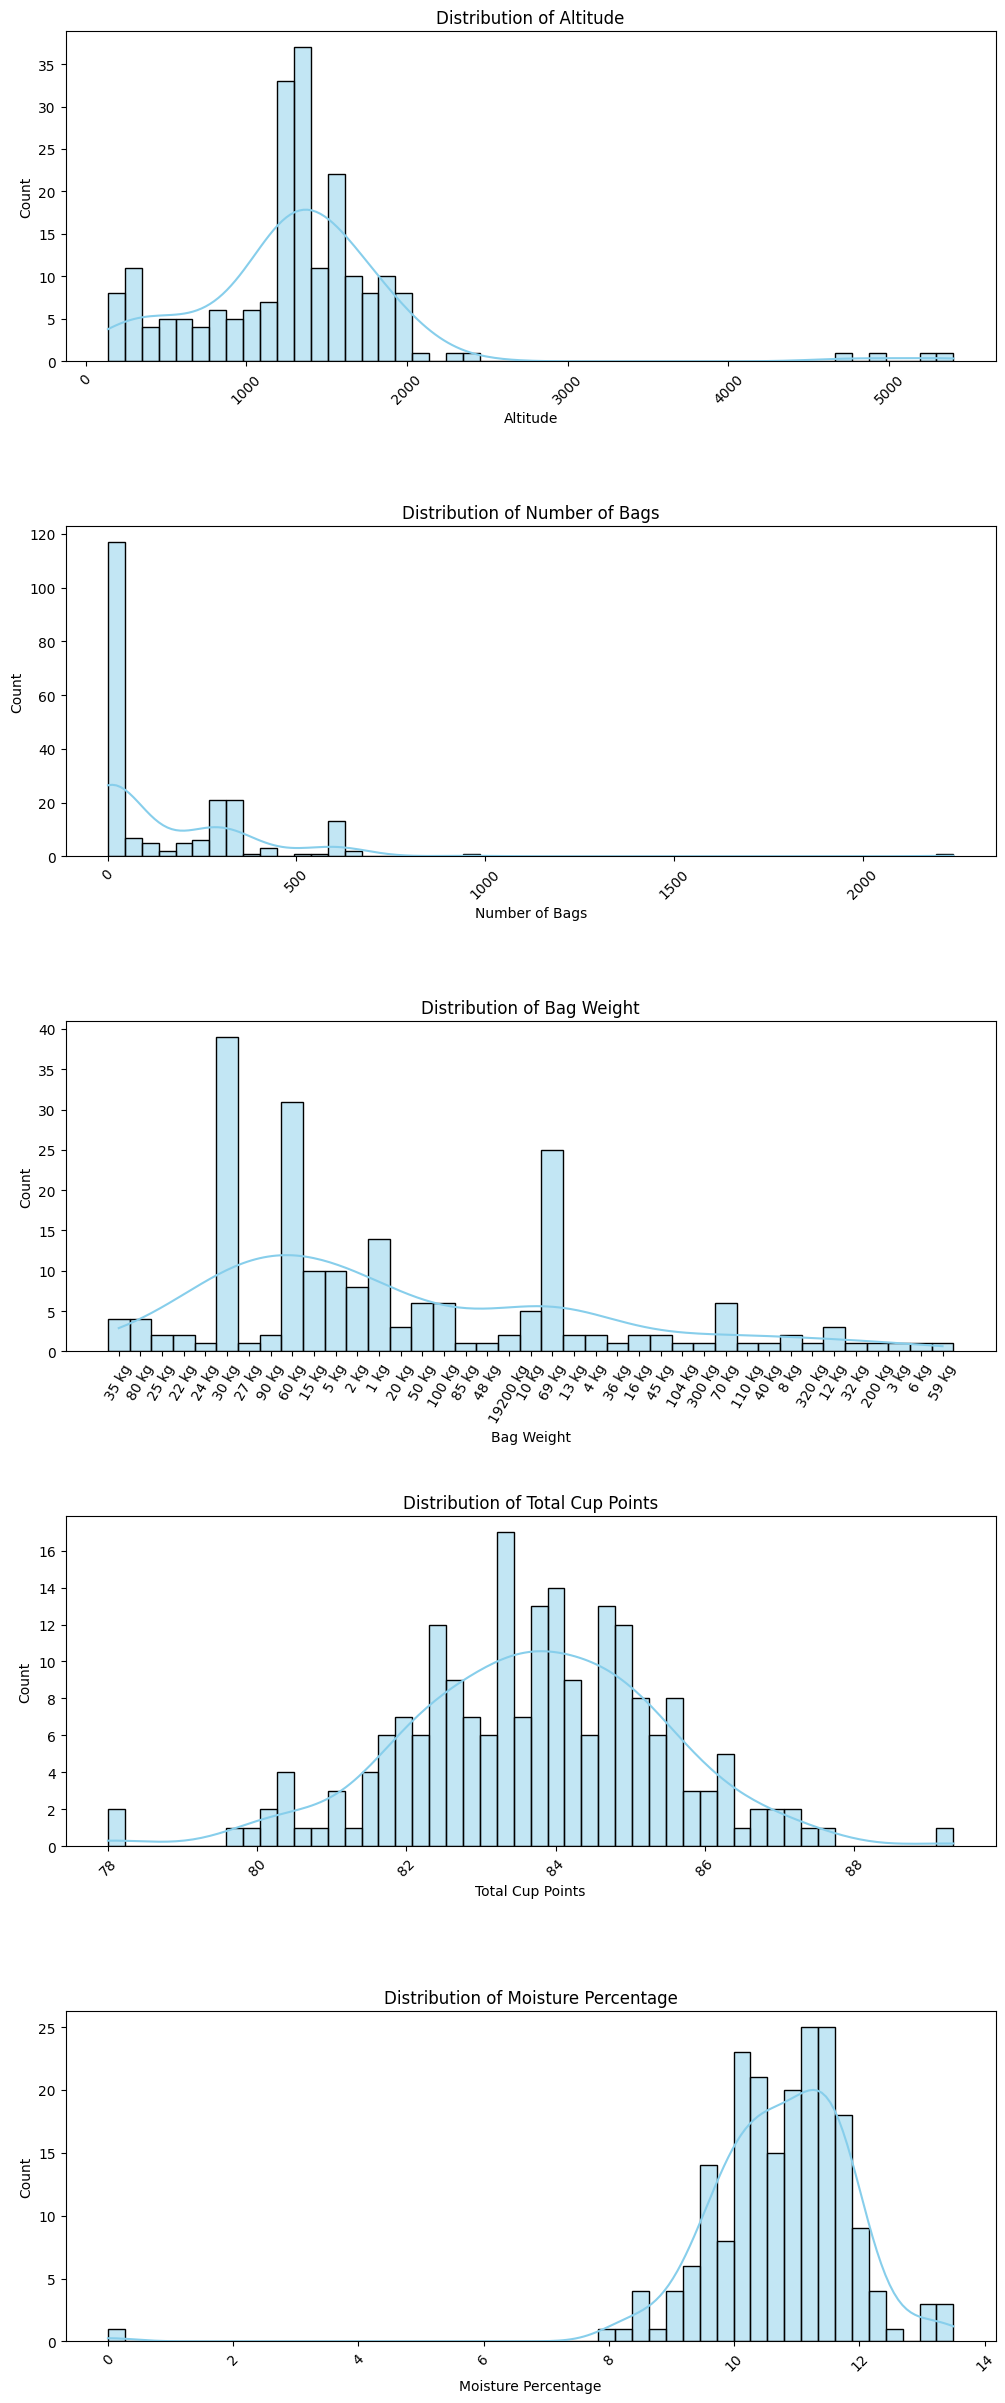

In [ ]:

# Assuming 'df' is your DataFrame and 'numeric_columns' is a list of numeric column names
numeric_columns = ['Altitude', 'Number of Bags', 'Bag Weight', 'Total Cup Points', 'Moisture Percentage']

# Set up subplots with increased figure size
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 6 * len(numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Plot histograms or kernel density plots for each numeric variable with increased bins and rotation
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=50, color='skyblue')
    axes[i].set_title(f'Distribution of {column}')

    # Rotate x-axis labels based on the column
    rotation_angle = 60 if column == 'Bag Weight' else 45
    axes[i].tick_params(axis='x', rotation=rotation_angle)

plt.show()


In [ ]:
from dateutil import parser
# Convert "Harvest Year" to datetime
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')

# No need to use parser.parse on "Expiration" if it's already in datetime format
# If it's not in datetime format, you can convert it similarly as "Harvest Year"
df['Expiration'] = pd.to_datetime(df['Expiration'])


In [ ]:
# Calculate the difference in days between "Expiration" and "Harvest Year" columns
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days


Excluding the column that is irrelevant for the purpose of this analysis.

In [ ]:
columns_to_drop = ['ID', 'ICO Number', 'Owner', 'Region', 'Certification Contact', 'Certification Address', 'Farm Name',
                   "Lot Number", "Mill", "ICO Number", "Producer", 'Company', 'Expiration', 'Harvest Year',
                   "Unnamed: 0", 'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Grading Date', 'Variety',
                   'Status', 'Defects', 'Uniformity', 'Clean Cup', 'Sweetness', 'Certification Body']
df.drop(columns_to_drop, axis=1, inplace=True)


The histograms generated for numeric attributes visualize their distributions. and a column is also generated Coffee Age

In [ ]:
# List of numeric attributes
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
                      'Total Cup Points', 'Moisture Percentage', 'Coffee Age']

# Create subplots
fig = make_subplots(rows=len(numeric_attributes), cols=1, subplot_titles=numeric_attributes)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes, start=1):
    trace = go.Histogram(x=df[attribute], nbinsx=50, name=attribute)
    fig.add_trace(trace, row=i, col=1)

# Update layout
fig.update_layout(height=200 * len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.update_xaxes(title_text="Value", row=len(numeric_attributes), col=1)

fig.show()

In [ ]:
# Identify missing values in each column
missing_data = df.isnull().sum()

# Filter columns with missing values
columns_with_missing_data = missing_data[missing_data > 0]

# Calculate the percentage of missing values for each column
percentage_missing = (columns_with_missing_data / len(df)) * 100

# Display the results
print("Columns with Missing Data:")
print(columns_with_missing_data)
print("\nPercentage of Missing Data:")
print(percentage_missing)


Columns with Missing Data:
Series([], dtype: int64)

Percentage of Missing Data:
Series([], dtype: float64)


In [ ]:
# Assuming 'Total Cup Points' is the target variable
correlation_matrix = df.corr()
target_correlation = correlation_matrix['Total Cup Points'].abs().sort_values(ascending=False)

# Display top correlated variables
print("Correlation Analysis:")
print(target_correlation)


Correlation Analysis:
Total Cup Points        1.000000
Overall                 0.947217
Flavor                  0.939124
Aftertaste              0.934813
Balance                 0.929520
Acidity                 0.897057
Aroma                   0.868919
Body                    0.847216
Quakers                 0.320307
Category Two Defects    0.314092
Altitude                0.120711
Coffee Age              0.115274
Category One Defects    0.058156
Moisture Percentage     0.046476
Name: Total Cup Points, dtype: float64


<ipython-input-50-f238f6039587>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Print data types of each column
print(df.dtypes)


Country of Origin        object
Altitude                float64
Processing Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Overall                 float64
Total Cup Points        float64
Moisture Percentage     float64
Category One Defects      int64
Quakers                   int64
Color                    object
Category Two Defects      int64
Coffee Age                int64
dtype: object


Which independent variables are useful to predict a target variable here the target Variable is Total Cup Points

In [ ]:
# 'Total Cup Points' is the target variable
X = df.drop('Total Cup Points', axis=1)
y = df['Total Cup Points']

# Identify and handle categorical variables with one-hot encoding
X_encoded = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Retry Method 2: Feature Importance from Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Display top features by importance
print("\nRandom Forest Feature Importance:")
print(feature_importances)


Random Forest Feature Importance:
Overall                                           7.088196e-01
Aftertaste                                        1.272729e-01
Balance                                           5.860525e-02
Flavor                                            4.932314e-02
Aroma                                             1.732432e-02
Acidity                                           1.281370e-02
Body                                              8.243505e-03
Coffee Age                                        3.765306e-03
Moisture Percentage                               2.484500e-03
Color_blue-green                                  2.385234e-03
Altitude                                          2.154232e-03
Category Two Defects                              2.152297e-03
Processing Method_Natural / Dry                   9.006871e-04
Processing Method_Washed / Wet                    5.729811e-04
Color_green                                       5.046949e-04
Country of Origin_Ta

The feature importances are calculated using the trained Random Forest model.
The importance scores are then sorted in descending order.

<ipython-input-53-97368b224f31>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




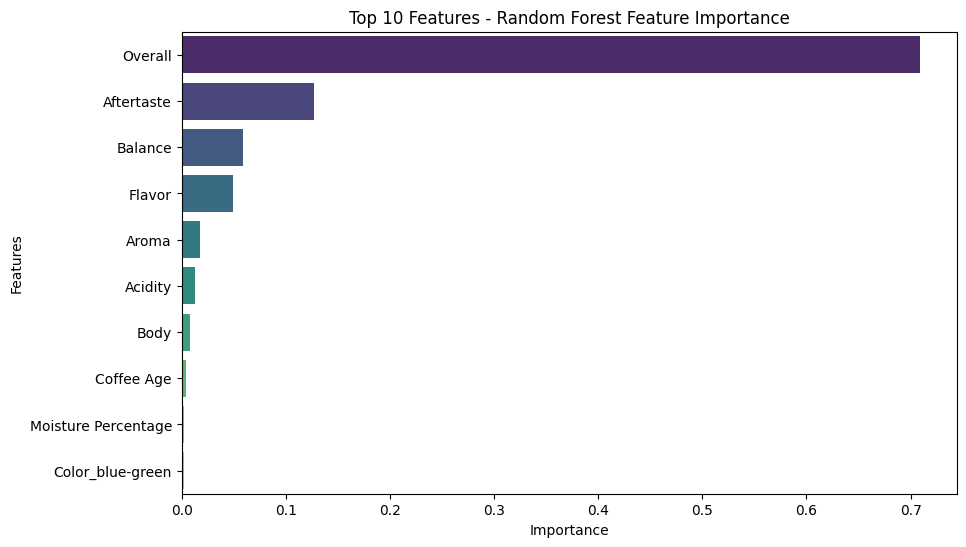

In [ ]:
# Display the top N important features
top_n_features = 10
top_features = feature_importances.head(top_n_features)

# Plotting the top N features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title(f"Top {top_n_features} Features - Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

These are the features used as independent variables in the analysis, and they are considered for predicting the target variable 'Total Cup Points.'

In [ ]:
# Check the column names in your dataframe
print(df.columns)


Index(['Country of Origin', 'Altitude', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Coffee Age'],
      dtype='object')


Using another method and changing target variable.

In [ ]:
# Assuming 'Processing Method' is the target variable
new_target_variable = 'Processing Method'

# Separate features and target variable
X = df.drop(new_target_variable, axis=1)
y = df[new_target_variable]

# Identify and encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Scale numerical features
scaler = StandardScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Train a Logistic Regression model for RFE (classification model)
model_lr = LogisticRegression(max_iter=1000)
rfe = RFE(model_lr, n_features_to_select=1)
fit = rfe.fit(X_encoded_scaled, y)

# RFE Ranking
ranking = pd.Series(fit.ranking_, index=X_encoded_scaled.columns).sort_values(ascending=True)

# Display features ranked by RFE
print("\nRFE Ranking for Predicting", new_target_variable, ":")
print(ranking)


RFE Ranking for Predicting Processing Method :
Aroma                                              1
Country of Origin_Brazil                           2
Color_yellow-green                                 3
Body                                               4
Color_green                                        5
Country of Origin_Colombia                         6
Flavor                                             7
Quakers                                            8
Color_greenish                                     9
Overall                                           10
Category One Defects                              11
Acidity                                           12
Color_pale yellow                                 13
Country of Origin_Taiwan                          14
Aftertaste                                        15
Category Two Defects                              16
Coffee Age                                        17
Total Cup Points                                  1

Recursive Feature Elimination (RFE) using a Logistic Regression model to rank the features based on their importance in predicting the target variable 'Processing Method.' The ranking is displayed, indicating the importance of each feature for predicting the processing method.

In [ ]:
data = df.copy()

# Define categorical and numerical columns
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Columns to drop
columns_to_drop = ['Country of Origin', 'Color']

# Drop unwanted columns
data.drop(columns_to_drop, axis=1, inplace=True)

# Apply one-hot encoding to the categorical column
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)


In [ ]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [ ]:
data = data.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

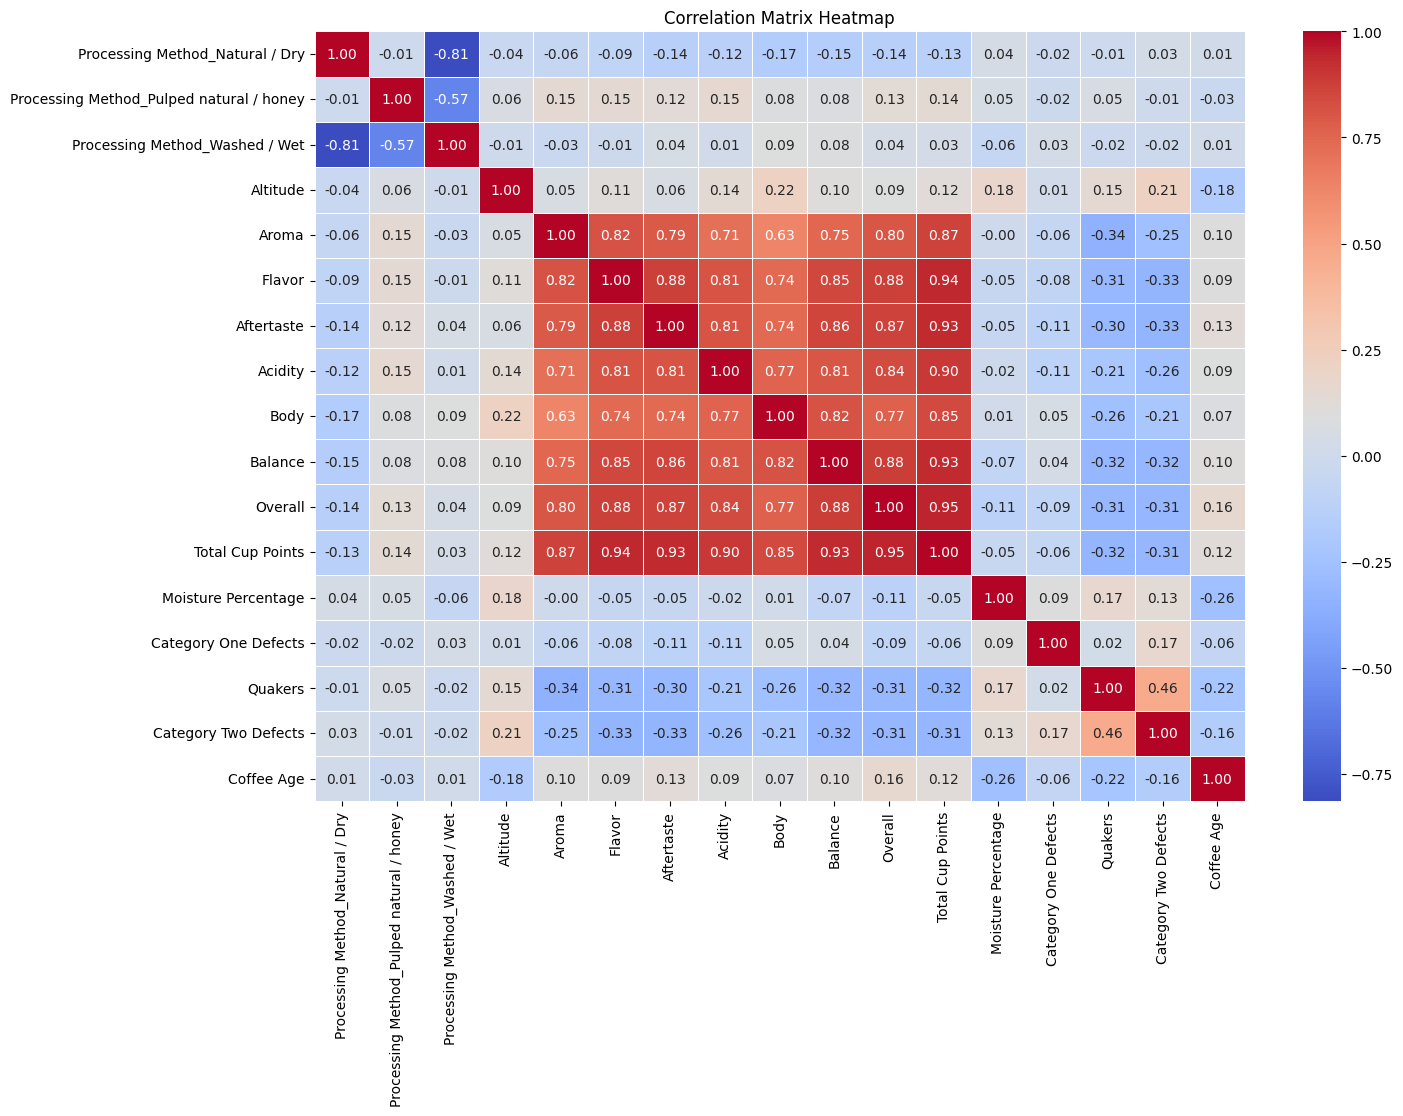

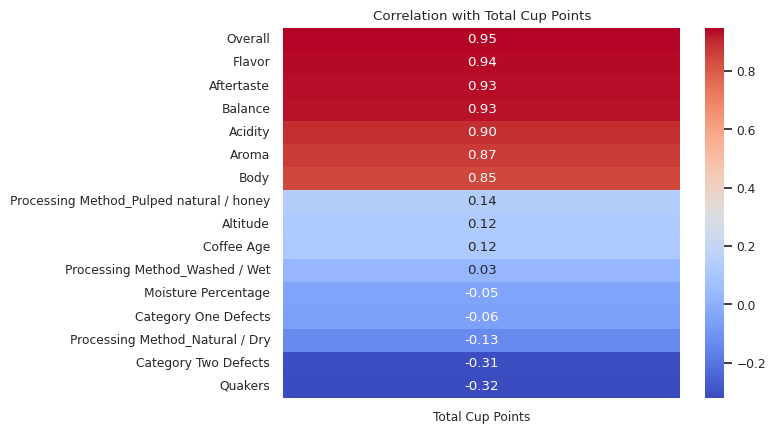

In [ ]:

# Calculate the correlation matrix
correlation_matrix = processed_df.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Calculate correlations with the target variable
corr = processed_df.corr()
target_corr = corr['Total Cup Points'].drop('Total Cup Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Plot the correlations with the target variable heatmap
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()


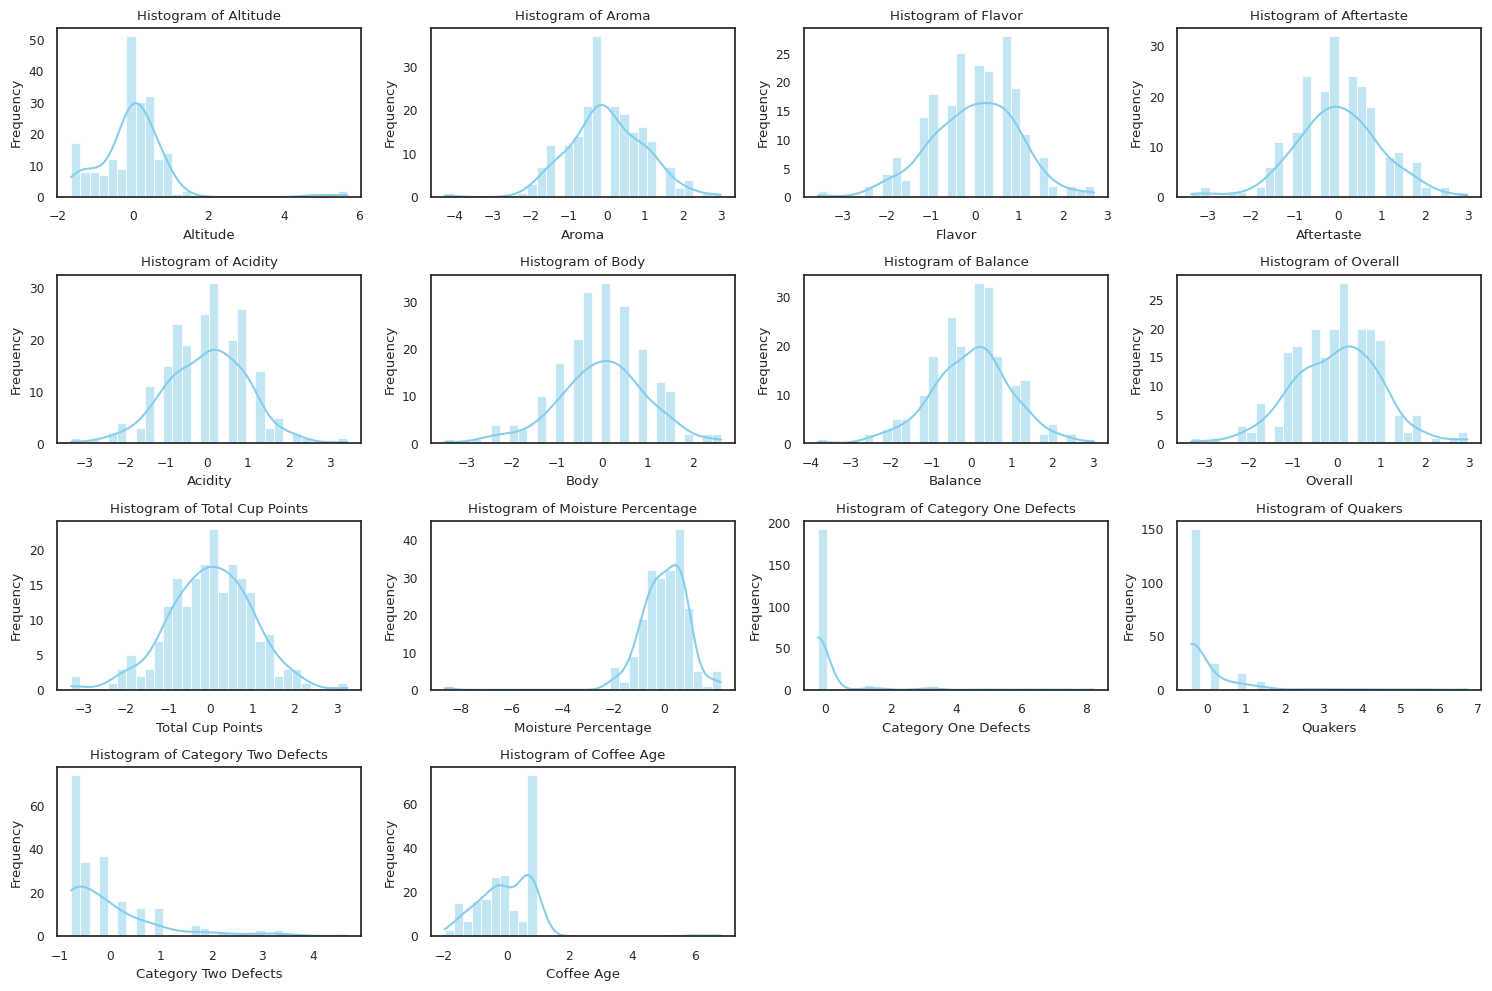

In [ ]:
# Numeric columns in your processed_df
numeric_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Plot histograms for each numeric variable
plt.figure(figsize=(15, 10))
for column in numeric_columns:
    plt.subplot(4, 4, numeric_columns.index(column) + 1)
    sns.histplot(processed_df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Country of Origin', 'Altitude', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Coffee Age'],
      dtype='object')


In [ ]:
# Calculate correlations with the target variable
corr = processed_df.corr()
target_corr = corr['Total Cup Points'].drop('Total Cup Points')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Display correlation values
print("Correlation with Total Cup Points:")
print(target_corr_sorted)

Correlation with Total Cup Points:
Overall                                     0.947217
Flavor                                      0.939124
Aftertaste                                  0.934813
Balance                                     0.929520
Acidity                                     0.897057
Aroma                                       0.868919
Body                                        0.847216
Processing Method_Pulped natural / honey    0.136157
Altitude                                    0.120711
Coffee Age                                  0.115274
Processing Method_Washed / Wet              0.030201
Moisture Percentage                        -0.046476
Category One Defects                       -0.058156
Processing Method_Natural / Dry            -0.133410
Category Two Defects                       -0.314092
Quakers                                    -0.320307
Name: Total Cup Points, dtype: float64


In [ ]:
# Separate features and target variable
X = processed_df.drop('Total Cup Points', axis=1)
y = processed_df['Total Cup Points']

# Initialize the model
model_lr = LinearRegression()

# Apply RFE
rfe = RFE(model_lr, n_features_to_select=1)
fit = rfe.fit(X, y)

# Display feature ranking
feature_ranking = pd.Series(fit.ranking_, index=X.columns).sort_values()
print("RFE Feature Ranking:")
print(feature_ranking)

RFE Feature Ranking:
Overall                                      1
Aftertaste                                   2
Flavor                                       3
Body                                         4
Aroma                                        5
Acidity                                      6
Balance                                      7
Category One Defects                         8
Altitude                                     9
Coffee Age                                  10
Category Two Defects                        11
Processing Method_Pulped natural / honey    12
Processing Method_Natural / Dry             13
Quakers                                     14
Moisture Percentage                         15
Processing Method_Washed / Wet              16
dtype: int64


In [ ]:
# Separate features and target variable
X = processed_df.drop('Total Cup Points', axis=1)
y = processed_df['Total Cup Points']

# Initialize the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model_rf.fit(X, y)

# Display feature importances
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(feature_importances)


Random Forest Feature Importances:
Overall                                     6.803502e-01
Aftertaste                                  9.651940e-02
Balance                                     9.299922e-02
Flavor                                      7.360787e-02
Acidity                                     1.847044e-02
Aroma                                       1.523780e-02
Body                                        8.684007e-03
Category Two Defects                        3.040819e-03
Altitude                                    2.832734e-03
Coffee Age                                  2.705448e-03
Moisture Percentage                         2.610988e-03
Quakers                                     1.685758e-03
Processing Method_Natural / Dry             1.071762e-03
Category One Defects                        9.803416e-05
Processing Method_Washed / Wet              8.486124e-05
Processing Method_Pulped natural / honey    7.033550e-07
dtype: float64


<ipython-input-73-63318a97a910>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




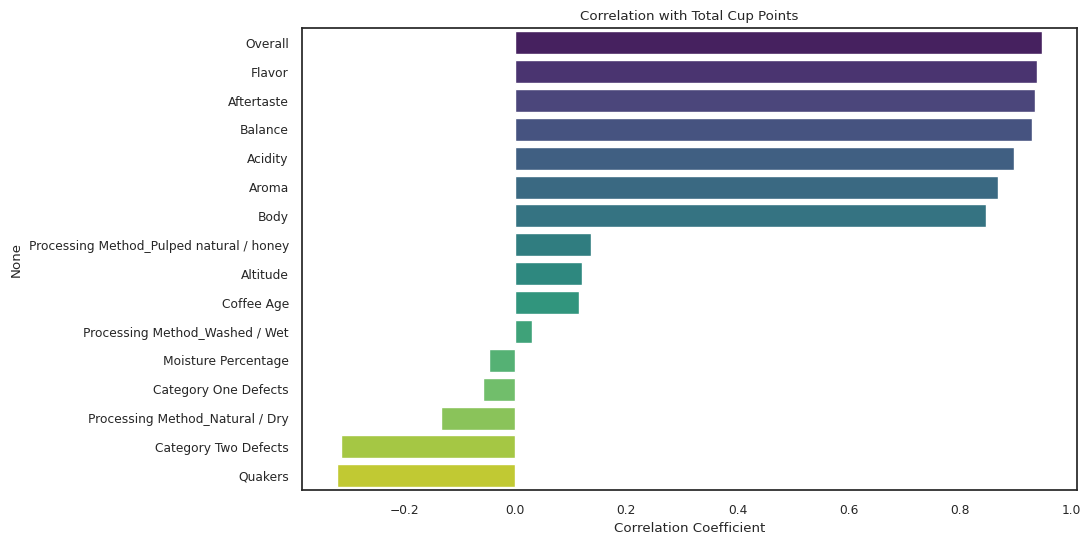

In [ ]:
# Display a bar plot of correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='viridis')
plt.title('Correlation with Total Cup Points')
plt.xlabel('Correlation Coefficient')
plt.show()

<ipython-input-74-5f86d8af90e1>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




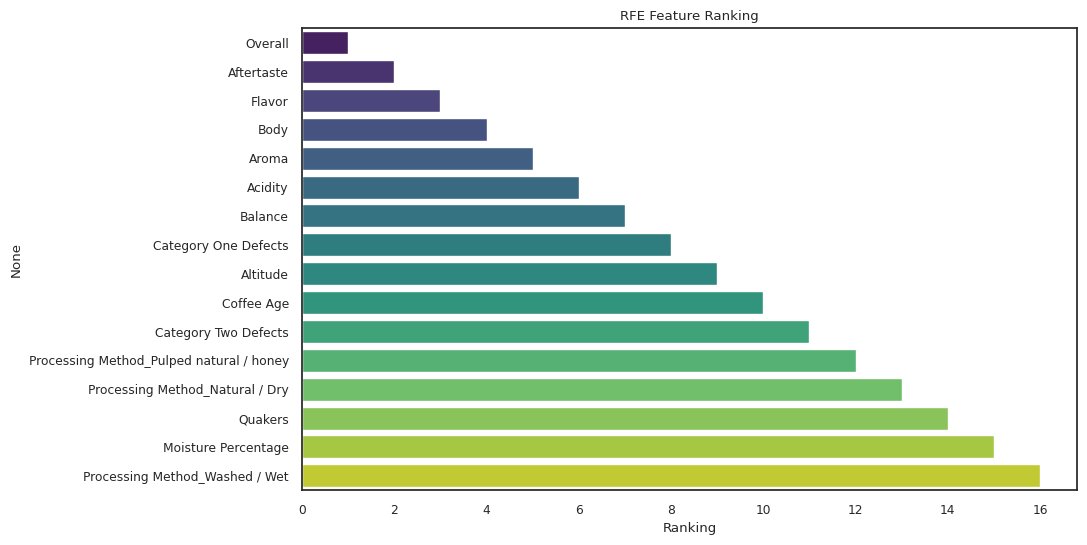

In [ ]:
# Display a bar plot of feature ranking
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_ranking.values, y=feature_ranking.index, palette='viridis')
plt.title('RFE Feature Ranking')
plt.xlabel('Ranking')
plt.show()

<ipython-input-75-719d0645cc15>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




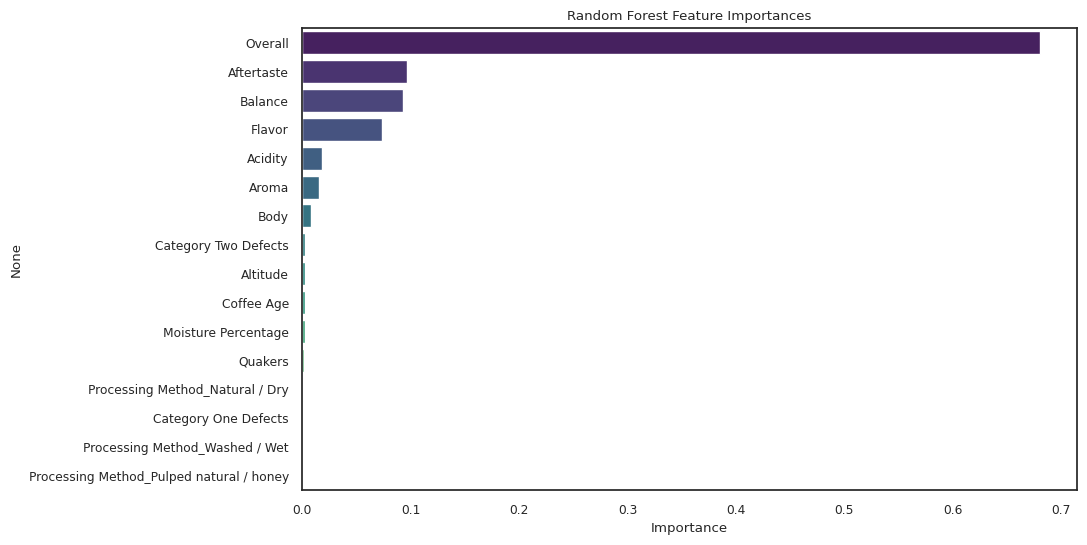

In [ ]:
# Display a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

In [ ]:
# Check for missing values in each column
missing_data = processed_df.isnull().sum()

# Filter columns with missing values
columns_with_missing_data = missing_data[missing_data > 0]

# Display the columns with missing values and their respective counts
print("Columns with Missing Data:")
print(columns_with_missing_data)

# Display the percentage of missing values for each column
missing_percentage = (missing_data / len(processed_df)) * 100
print("\nPercentage of Missing Data for Each Column:")
print(missing_percentage[columns_with_missing_data.index])


Columns with Missing Data:
Series([], dtype: int64)

Percentage of Missing Data for Each Column:
Series([], dtype: float64)


In [ ]:
# Check for missing data in the processed_df
missing_data = processed_df.isnull().sum()

# Display variables with missing data and their corresponding counts
missing_data = missing_data[missing_data > 0]
print("Variables with Missing Data:")
print(missing_data)


Variables with Missing Data:
Series([], dtype: int64)


In [ ]:
# Assuming processed_df is your dataframe
X = processed_df.drop('Total Cup Points', axis=1)  # Features
y = processed_df['Total Cup Points']  # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the two sets have the same data
same_data = X_train.equals(X_test) and y_train.equals(y_test)

# Display the result
print("Training and Test Sets Have the Same Data:", same_data)

Training and Test Sets Have the Same Data: False


Created a co realtional matrix to determine what to pick.

This also answers the in the predictor variables independent of all the other predictor variables which it is.

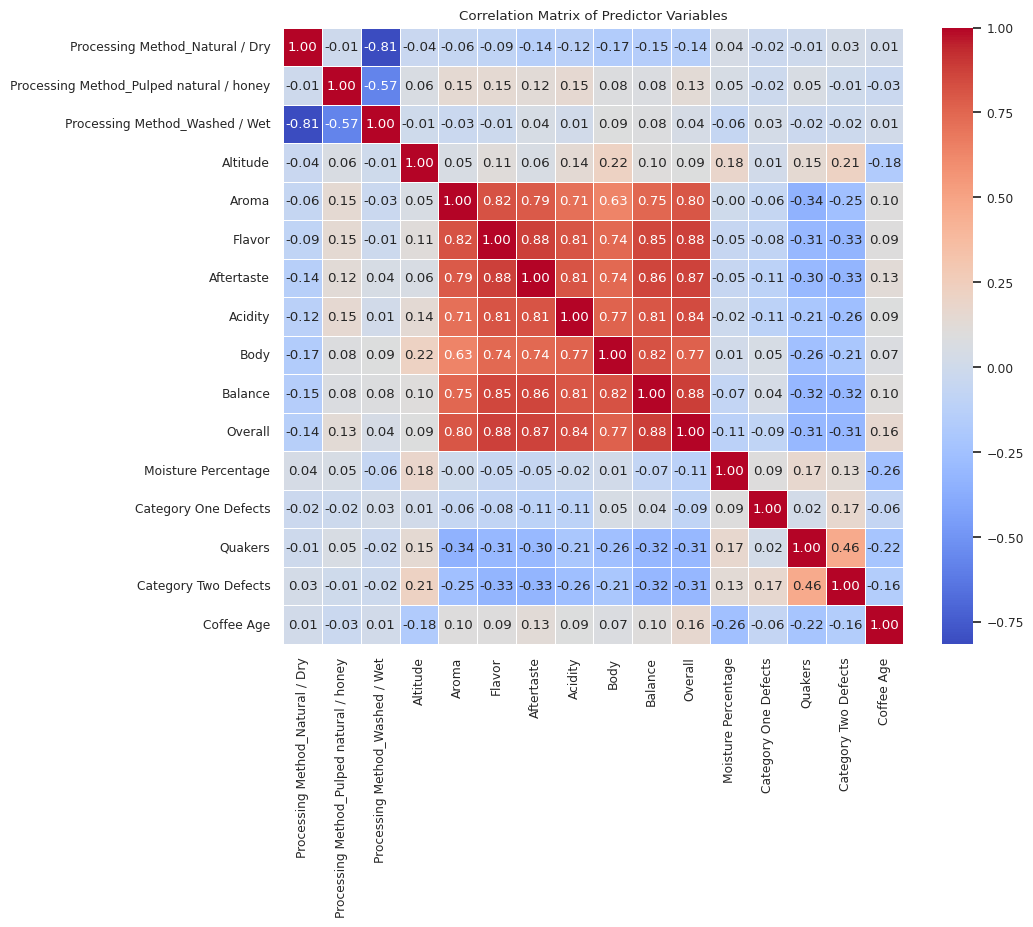

In [ ]:
# Assuming X contains your predictor variables
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix of Predictor Variables")
plt.show()

In [ ]:
# Features (X)
predictor_columns = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall'
]

X = processed_df[predictor_columns]

# Target variable (y)
y = processed_df['Total Cup Points']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Optionally, you can use the trained model to make predictions on the test set
y_pred = model_rf.predict(X_test)
# Evaluate the model's performance based on your specific task

Feature Importances:
Overall       0.699905
Aftertaste    0.130440
Balance       0.069316
Flavor        0.053030
Aroma         0.017630
Acidity       0.015986
Body          0.013693
dtype: float64


Do the training and test sets have the same data

The summary statistics for the Overall feature in the training and test sets suggest that the distributions are somewhat similar but not identical. Here are some observations:

Training Set:

count    165.000000
mean       7.685879
std        0.313378
min        6.670000
25%        7.500000
50%        7.750000
75%        7.920000
max        8.580000
Name: Overall, dtype: float64

Test Set Summary:
count    42.000000
mean      7.641190
std       0.277693
min       6.830000
25%       7.500000
50%       7.670000
75%       7.810000
max       8.


While the mean values are close, the standard deviations and ranges differ slightly between the training and test sets. This is a common scenario in real-world datasets.

In [ ]:
# Check summary statistics or distributions of key features
key_feature = 'Overall'  # Replace with any relevant feature
print("Training Set Summary:")
print(X_train[key_feature].describe())

print("\nTest Set Summary:")
print(X_test[key_feature].describe())

Training Set Summary:
count    165.000000
mean       7.685879
std        0.313378
min        6.670000
25%        7.500000
50%        7.750000
75%        7.920000
max        8.580000
Name: Overall, dtype: float64

Test Set Summary:
count    42.000000
mean      7.641190
std       0.277693
min       6.830000
25%       7.500000
50%       7.670000
75%       7.810000
max       8.170000
Name: Overall, dtype: float64


Which predictor variables are the most important Here you can see the plot below of the Importamnce.

<ipython-input-81-b0750374b112>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




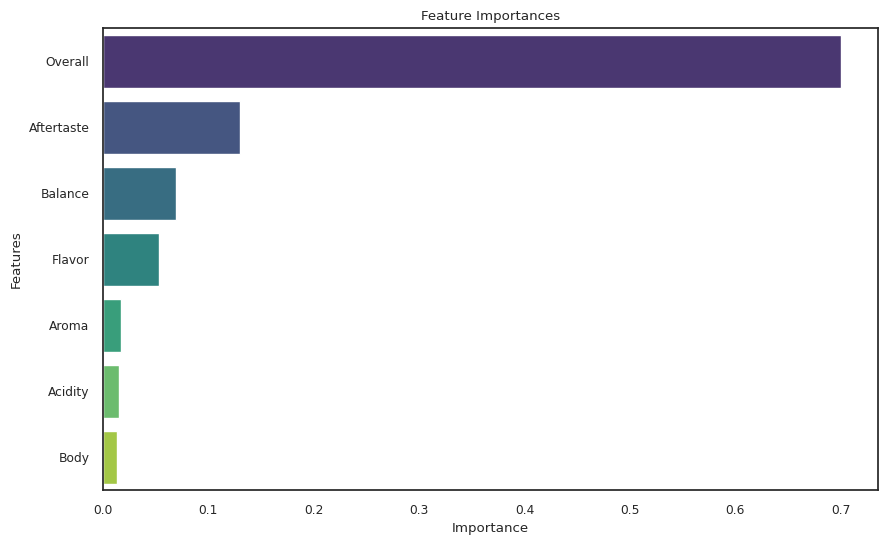

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
descriptive_stats = processed_df.describe()
print(descriptive_stats)

       Processing Method_Natural / Dry  \
count                       207.000000   
mean                          0.009662   
std                           0.098056   
min                           0.000000   
25%                           0.000000   
50%                           0.000000   
75%                           0.000000   
max                           1.000000   

       Processing Method_Pulped natural / honey  \
count                                207.000000   
mean                                   0.004831   
std                                    0.069505   
min                                    0.000000   
25%                                    0.000000   
50%                                    0.000000   
75%                                    0.000000   
max                                    1.000000   

       Processing Method_Washed / Wet      Altitude         Aroma  \
count                      207.000000  2.070000e+02  2.070000e+02   
mean                   

The ranges of the predictor variables below is visualised.

<Figure size 1600x1000 with 0 Axes>

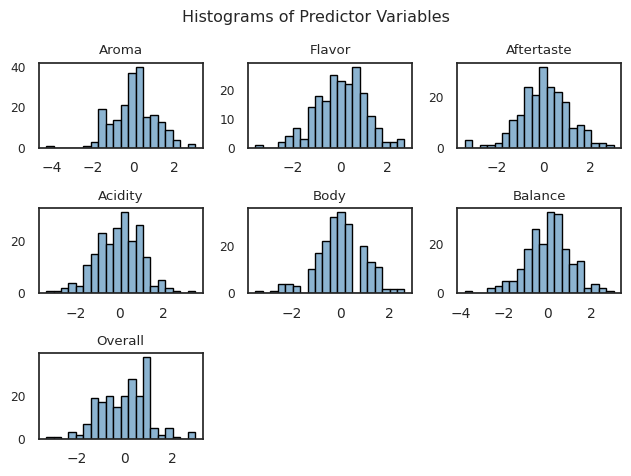

In [ ]:
# Assuming 'selected_predictors' is your list of predictor variables
selected_predictors = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall']

# Assuming 'processed_df' is your dataframe
X = processed_df[selected_predictors]

# Create histograms for each variable with adjustments
plt.figure(figsize=(16, 10))
X.hist(bins=20, edgecolor='black', grid=False, xlabelsize=10, xrot=0)
plt.suptitle('Histograms of Predictor Variables')
plt.tight_layout()
plt.show()


What are the distributions of the predictor variables
Used a box plot to show the ranges and outliers.  

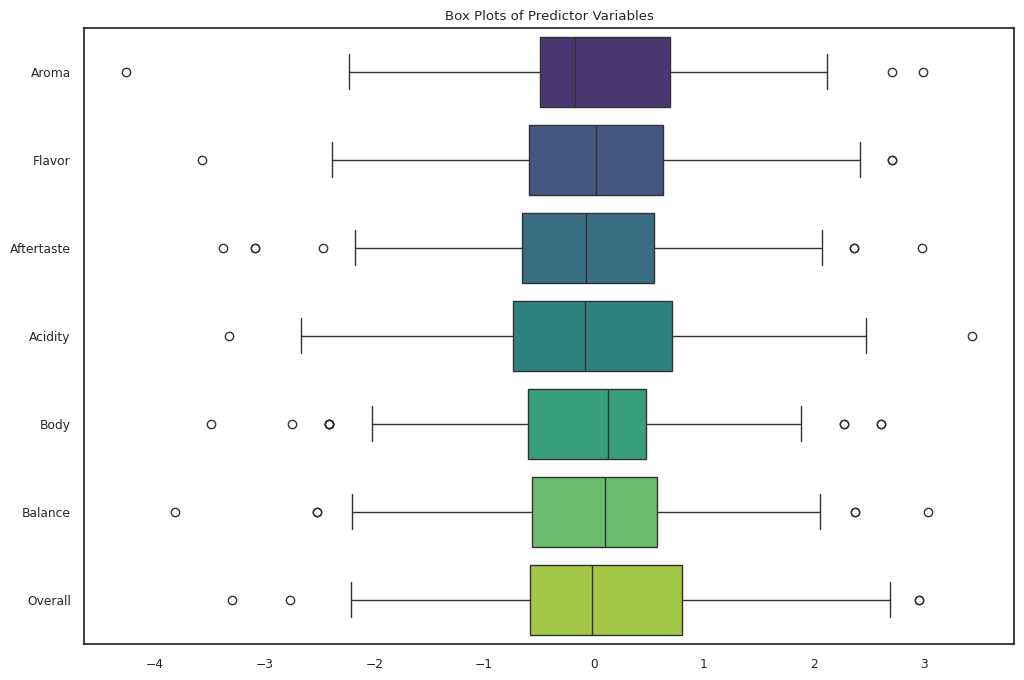

In [ ]:
# Create box plots for each variable
plt.figure(figsize=(12, 8))
sns.boxplot(data=X, orient='h', palette='viridis')
plt.title('Box Plots of Predictor Variables')
plt.show()

Removing outliers and keep outlier and also checking difference with the outlier and without the outlier.

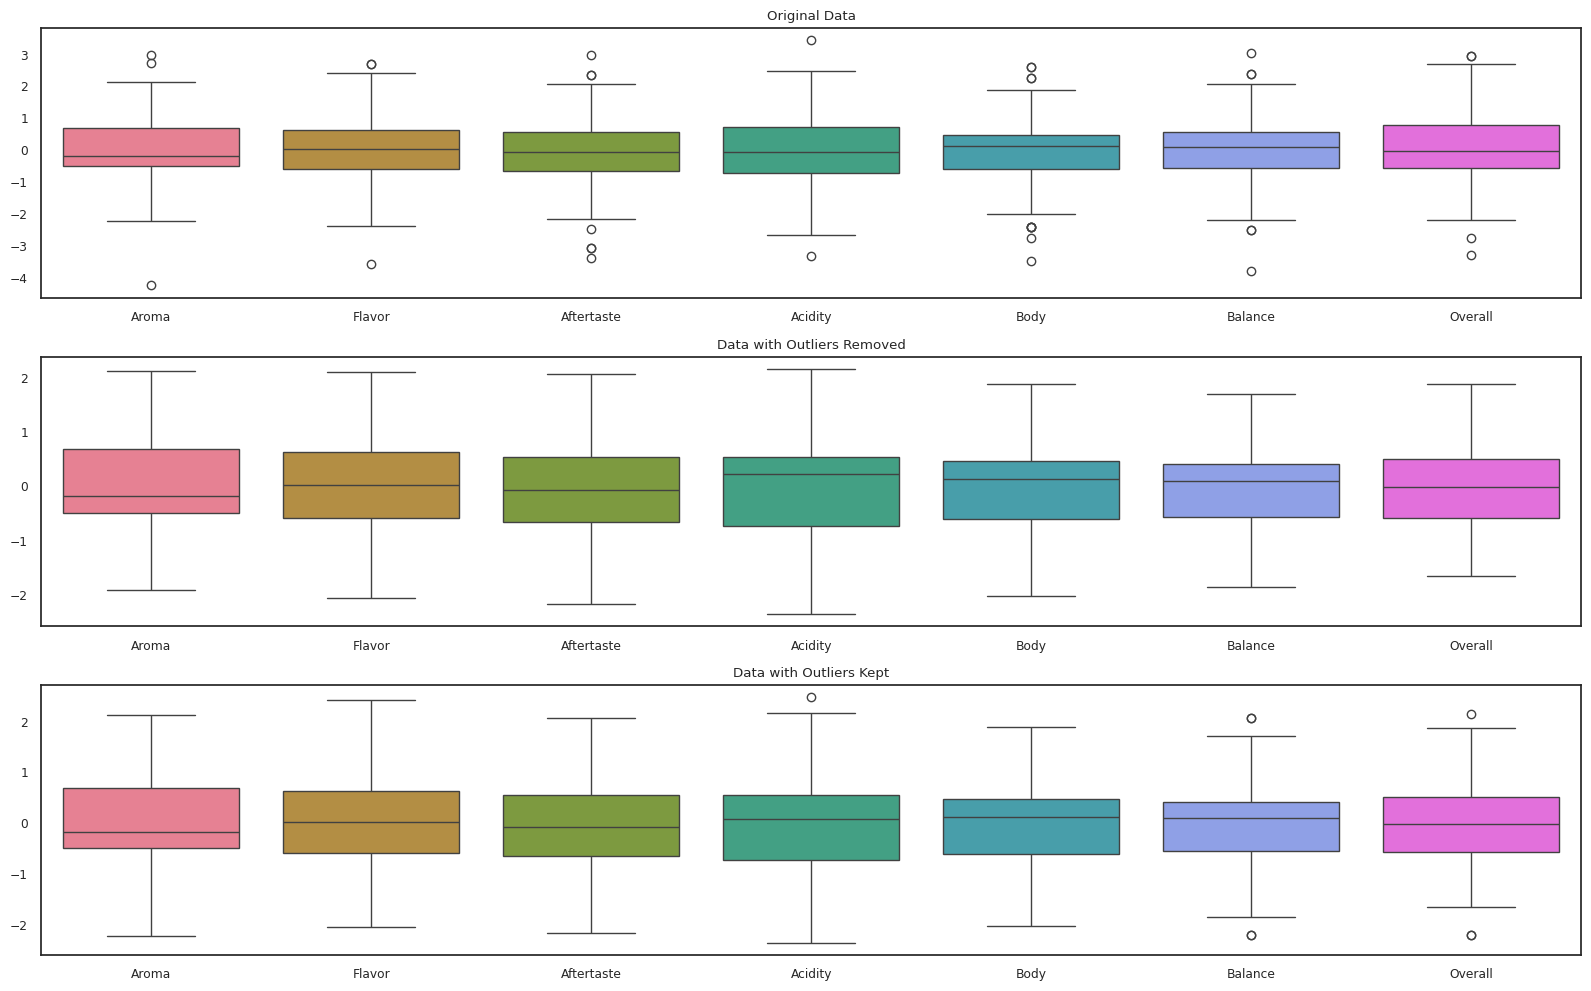

In [ ]:
# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Function to keep outliers based on IQR
def keep_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
    return df

# Make a copy of the dataframe for demonstration
df_removed_outliers = remove_outliers(processed_df.copy(), selected_predictors)
df_kept_outliers = keep_outliers(processed_df.copy(), selected_predictors)

# Visualize the impact on box plots
plt.figure(figsize=(16, 10))

# Original Data
plt.subplot(3, 1, 1)
sns.boxplot(data=processed_df[selected_predictors])
plt.title('Original Data')

# Data with Outliers Removed
plt.subplot(3, 1, 2)
sns.boxplot(data=df_removed_outliers[selected_predictors].dropna())
plt.title('Data with Outliers Removed')

# Data with Outliers Kept
plt.subplot(3, 1, 3)
sns.boxplot(data=df_kept_outliers[selected_predictors].dropna())
plt.title('Data with Outliers Kept')

plt.tight_layout()
plt.show()


A complete report for what will be output when you Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods.

KNN (k-Nearest Neighbors):

imputed_knn = KNN(k=5).fit_transform(df_missing)

Iterative Imputer:imputed_iterative = IterativeImputer().fit_transform(df_missing)

Simple Fill:imputed_simple_fill = SimpleFill().fit_transform(df_missing)


These methods are applied to impute missing values in the dataset (df_missing) for each specified percentage of randomly removed data.
After imputation, the code calculates the percentage error on residuals for each predictor variable, as well as checks the bias and variance of the error.
This allows you to assess how well each imputation method performs in recovering the missing values and understand the potential bias and variance introduced by the imputed values.

Here's a brief explanation of each method:

KNN (k-Nearest Neighbors):It imputes missing values based on the values of their k-nearest neighbors.

Iterative Imputer: It imputes missing values using iterative regression.

Simple Fill: It imputes missing values with the mean or median of the observed values in the column.

In [ ]:
from fancyimpute import KNN, IterativeImputer, SimpleFill

# Assuming 'processed_df' is your dataframe
# Assuming 'selected_predictors' is your list of predictor variables

# Function to randomly remove data
def randomly_remove_data(df, percent_to_remove):
    df_copy = df.copy()
    total_rows = df_copy.shape[0]
    num_rows_to_remove = int(total_rows * percent_to_remove)
    indices_to_remove = np.random.choice(total_rows, num_rows_to_remove, replace=False)
    df_copy.iloc[indices_to_remove, :] = np.nan
    return df_copy

# Function to calculate percentage error on residuals
def calculate_percentage_error(original, imputed):
    mask = ~np.isnan(original)
    original_non_missing = original[mask]
    imputed_non_missing = imputed[mask]
    mse = mean_squared_error(original_non_missing, imputed_non_missing)
    rmse = np.sqrt(mse)
    percentage_error = (rmse / np.mean(original_non_missing)) * 100
    return percentage_error

# Function to check bias and variance of the error
def check_bias_variance(original, imputed):
    residuals = original - imputed
    bias = np.mean(residuals)
    variance = np.var(residuals)
    return bias, variance

# Specify percentages to remove
percentages_to_remove = [0.01, 0.05, 0.1]

# Loop through each percentage
for percent_to_remove in percentages_to_remove:
    # Randomly remove data
    df_missing = randomly_remove_data(processed_df, percent_to_remove)

    # Impute missing values using KNN, IterativeImputer, and SimpleFill
    imputed_knn = KNN(k=5).fit_transform(df_missing)
    imputed_iterative = IterativeImputer().fit_transform(df_missing)
    imputed_simple_fill = SimpleFill().fit_transform(df_missing)

    # Calculate percentage error on residuals for numeric data
    for predictor in selected_predictors:
        original_data = processed_df[predictor].values
        imputed_data_knn = imputed_knn[:, processed_df.columns.get_loc(predictor)]
        imputed_data_iterative = imputed_iterative[:, processed_df.columns.get_loc(predictor)]
        imputed_data_simple_fill = imputed_simple_fill[:, processed_df.columns.get_loc(predictor)]

        percentage_error_knn = calculate_percentage_error(original_data, imputed_data_knn)
        percentage_error_iterative = calculate_percentage_error(original_data, imputed_data_iterative)
        percentage_error_simple_fill = calculate_percentage_error(original_data, imputed_data_simple_fill)

        # Print results
        print(f"Percent Removed: {percent_to_remove * 100}% | Predictor: {predictor}")
        print(f"Percentage Error (KNN): {percentage_error_knn:.2f}%")
        print(f"Percentage Error (Iterative): {percentage_error_iterative:.2f}%")
        print(f"Percentage Error (Simple Fill): {percentage_error_simple_fill:.2f}%")
        print()

        # Check bias and variance of the error
        bias_knn, variance_knn = check_bias_variance(original_data, imputed_data_knn)
        bias_iterative, variance_iterative = check_bias_variance(original_data, imputed_data_iterative)
        bias_simple_fill, variance_simple_fill = check_bias_variance(original_data, imputed_data_simple_fill)

        print(f"Bias (KNN): {bias_knn:.2f}")
        print(f"Variance (KNN): {variance_knn:.2f}")
        print(f"Bias (Iterative): {bias_iterative:.2f}")
        print(f"Variance (Iterative): {variance_iterative:.2f}")
        print(f"Bias (Simple Fill): {bias_simple_fill:.2f}")
        print(f"Variance (Simple Fill): {variance_simple_fill:.2f}")
        print("=" * 50)

Imputing row 1/207 with 0 missing, elapsed time: 0.010
Imputing row 101/207 with 0 missing, elapsed time: 0.011
Imputing row 201/207 with 0 missing, elapsed time: 0.012
[KNN] Warning: 34/3519 still missing after imputation, replacing with 0
Percent Removed: 1.0% | Predictor: Aroma
Percentage Error (KNN): -2690326251632962.00%
Percentage Error (Iterative): -2691044708252128.50%
Percentage Error (Simple Fill): -2691044708252129.00%

Bias (KNN): -0.00
Variance (KNN): 0.01
Bias (Iterative): -0.00
Variance (Iterative): 0.01
Bias (Simple Fill): -0.00
Variance (Simple Fill): 0.01
Percent Removed: 1.0% | Predictor: Flavor
Percentage Error (KNN): -6732663414125401.00%
Percentage Error (Iterative): -6738718043061798.00%
Percentage Error (Simple Fill): -6738718043061801.00%

Bias (KNN): -0.00
Variance (KNN): 0.00
Bias (Iterative): -0.00
Variance (Iterative): 0.00
Bias (Simple Fill): -0.00
Variance (Simple Fill): 0.00
Percent Removed: 1.0% | Predictor: Aftertaste
Percentage Error (KNN): -126680296

Percentage Error:

The percentage error represents how much the imputed values differ from the original values, expressed as a percentage of the mean of the original values.
Bias and Variance:

Bias and variance are statistical measures related to the accuracy and precision of the imputed values. Bias measures the average difference between imputed and true values, while variance measures the spread or variability of these differences.

Low bias and variance indicate that, on average, imputed values are close to the true values, but there is consistency in the imputation quality.


This can improved as more of the real world data comes in

Using the regression model, Random Forest Feature Importance and RFE Ranking for Predicting Total Cup Points.

In [ ]:
# Assuming df is your DataFrame
X = df[selected_predictors]
y = df['Total Cup Points']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print the coefficients to understand the feature importance
print("Linear Regression Coefficients:")
for feature, coef in zip(selected_predictors, linear_model.coef_):
    print(f"{feature}: {coef}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=selected_predictors).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:")
print(feature_importance)


rfe_model = LinearRegression()
rfe = RFE(rfe_model, n_features_to_select=1)
fit = rfe.fit(X_train, y_train)

# Display features ranked by RFE
ranking = pd.Series(fit.ranking_, index=selected_predictors).sort_values(ascending=True)
print("\nRFE Ranking for Predicting Total Cup Points:")
print(ranking)

Linear Regression Coefficients:
Aroma: 1.0185573986309018
Flavor: 1.020936016864344
Aftertaste: 1.1586000497574158
Acidity: 0.951627366074969
Body: 1.060873547953752
Balance: 0.7924393862314545
Overall: 0.9768125309531002

Random Forest Feature Importance:
Overall       0.700046
Aftertaste    0.131294
Balance       0.066269
Flavor        0.055704
Aroma         0.018436
Acidity       0.015318
Body          0.012933
dtype: float64

RFE Ranking for Predicting Total Cup Points:
Aftertaste    1
Overall       2
Flavor        3
Body          4
Aroma         5
Acidity       6
Balance       7
dtype: int64


<ipython-input-98-469b08f2e9fe>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




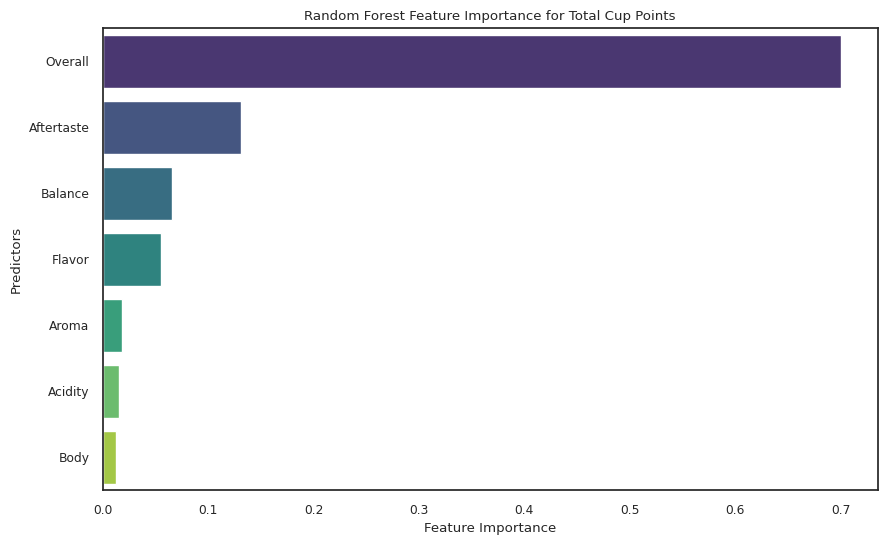

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Random Forest Feature Importance for Total Cup Points")
plt.xlabel("Feature Importance")
plt.ylabel("Predictors")
plt.show()

The most important factor here is the Overall Taste of the coffee.

Trying and experimenting with the Classification as well.

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
X = df[selected_predictors]
y = df['Total Cup Points']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.001669574705082765


In [ ]:
# Assuming 'Total Cup Points' is the target variable
target_variable = 'Total Cup Points'

# Create bins for classification (you can adjust these thresholds)
bins = [0, 80, 85, 90, 95, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new categorical column based on the bins
df['Cup Points Category'] = pd.cut(df[target_variable], bins=bins, labels=labels, right=False)

# Separate features and target variable
X = df.drop([target_variable, 'Cup Points Category'], axis=1)
y = df['Cup Points Category']

# Identify and encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Scale numerical features (optional, depending on the classification algorithm)
scaler = StandardScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns)

# Convert the target variable to categorical if it's not
y = y.astype('category')

# Train a Classification Model (e.g., Logistic Regression)
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_encoded_scaled, y)

# Make Predictions
predictions = model_lr.predict(X_encoded_scaled)

# Evaluate the Model (e.g., using accuracy and confusion matrix)
accuracy = accuracy_score(y, predictions)
conf_matrix = confusion_matrix(y, predictions)

# Display Results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[156   0   0]
 [  0  48   0]
 [  0   0   3]]


The first row indicates instances where the true class is 'Very Low':

156 instances were correctly classified as 'Very Low' (True Negatives).
There are no False Positives (instances incorrectly classified as 'Very Low').
The second row indicates instances where the true class is 'Low':

48 instances were correctly classified as 'Low' (True Positives).
There are no False Negatives (instances incorrectly classified as 'Low').
The third row indicates instances where the true class is 'Medium':

3 instances were correctly classified as 'Medium' (True Positives).
There are no False Negatives (instances incorrectly classified as 'Medium').


Note: This is due the size of dataset is realtively small hence the perfect accuracy.

MIT License

Copyright (c) 2024 baiganas

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.